# The Pandas Library

Pandas is a wonderful data organization and processing library.  It works off of a single major underlying structure, the `DataFrame`.  The `DataFrame` is an object that can be described as a "dictionary of dictionaries".  Similar to how previous examples have shown that you can have nested dictionary datatypes, Pandas takes it a step further and provides tools to organize, manipulate, combine, compare, and store these multi-layer dictionaries.  Pandas also includes built-in Excel Spreadsheet creation functionality, meaning that you can transform your data into more complex structures in Excel, making it easier to share with collaborators.

Let's look at an example of a simple dataframe with just a few rows and columns.

In [2]:
import pandas as pd

df = pd.DataFrame([{"First Name":"Zee","Age":40,"Team":"Blue"},
                   {"First Name":"Charlotte","Age":45,"Team":"Red"},
                   {"First Name":"Wilbur","Age":50,"Team":"Green"}])

In [3]:
display(df)

,First Name,Age,Team
0,Zee,40,Blue
1,Charlotte,45,Red
2,Wilbur,50,Green


In [4]:
print(df)

  First Name  Age   Team
0        Zee   40   Blue
1  Charlotte   45    Red
2     Wilbur   50  Green


Notice the difference between `display` and `print` in the example above.  It should be pointed out that `display` is functional in notebook environments only, not in terminals.  Trying to use `display` in a terminal will result in an error.

You can add to existing dataframes by appending new rows.  Each row will be made as a dictionary beforehand.


In [5]:
newrow = {"First Name":"Iroh","Age":99,"Team":"Red"}
df = df.append(newrow,ignore_index=True)

In [6]:
display(df)

,First Name,Age,Team
0,Zee,40,Blue
1,Charlotte,45,Red
2,Wilbur,50,Green
3,Iroh,99,Red


Notice that we had to reassign the dataframe when we added the new row.  This is because all of the internal dataframe functions return a *new* dataframe object.  This method ensures that dataframes are not overwritten on accident, and that data is not lost without intent.  Also, we now have two rows that have a shared value in a column.  We can sort the rows by specific columns, which can be used to group things together.  We can also group by multiple columns to have improved organization.

In [7]:
df2 = df.sort_values("Team",ascending=True)
display(df2)

,First Name,Age,Team
0,Zee,40,Blue
2,Wilbur,50,Green
1,Charlotte,45,Red
3,Iroh,99,Red


In [8]:
df3 = df.sort_values(["Team","Age"],ascending=[True,False])
display(df3)

,First Name,Age,Team
0,Zee,40,Blue
2,Wilbur,50,Green
3,Iroh,99,Red
1,Charlotte,45,Red


In the first cell, we sort only by the column "Team", and put the results in ascending order.  Pandas uses alphabetical sorting unless all cells in a column are *entirely* numerical.

In the second cell, we sorted by a list, which means the whole dataframe is sorted by the first element, and any rows that have the same value in that first element are then sorted by the second element, and so on.  Additionally, we use a second list for the ascending values to set the ascending/descending state for each element being sorted.

What if we wanted just the values in one column?  We can call the dataframe like we would a dictionary, using the square brackets and a column name.


In [9]:
print(df["Age"])

0    40
1    45
2    50
3    99
Name: Age, dtype: int64


In [10]:
print(df["Age"].values)

[40 45 50 99]


We can also call individual rows with the `.iloc` function.  In the example below, `.iloc(0)` indicates we're iterating on the 0th axis, which is down the rows.  The `[2]` indicates we want the data at index 2 in that list of rows.  In the original `df` dataframe object, that is the third row.

In [12]:
print(df.iloc(0)[2])

First Name    Wilbur
Age               50
Team           Green
Name: 2, dtype: object


Let's consider an example that might be more relevant to the lab.  Mark is currently working on a Automated Fluorescent Nucleotide Workflow (that needs a better name with a fun acronym).  Over time, this workflow is intended to produce large amounts of data for hundreds - even thousands - of molecules.  We want to use this data in a machine learning model to predict possible new fluorescent nucleotides.  

We can use Pandas to organize this data into a more easily managed form.

What are the different things to consider for each of the molecules?
- Sugar type (Ribose / Deoxyribose)
- Nucleobase (A/C/G/T/U)
- Connection point on the base (C6,C5, etc.)
- Tag structure and connection point.
- Absorption Wavelength
- Emission Wavelength
- Quantum Yield

Let's assume that we don't have all that information for every single molecule just yet.  In fact, that's kind of the point of machine learning, filling in the gaps of data.



In [54]:
## A list of all the columns we want in our dataframe, corresponding to values we want to keep track of for each system.
df_columns = ["Sugar","Base","ConnectionPoint","FluorescentTag","AbsorptionWavelength","EmissionWavelength","QuantumYield"]

## Initialize the dataframe without data, just column names
nucleotides = pd.DataFrame(columns=df_columns)

display(nucleotides)



,Sugar,Base,ConnectionPoint,FluorescentTag,AbsorptionWavelength,EmissionWavelength,QuantumYield


I'm including a function below to make my life easier for the example process, but if we haven't talked about functions yet, you can ignore it for now.

In [55]:
def add_molecule(df,**kwargs):
    new_molecule = {}
    for key,val in kwargs.items():
        new_molecule[key] = val
    df = df.append(new_molecule,ignore_index=True)
    return df


In [56]:
nucleotides = add_molecule(nucleotides,Sugar="Ribose",Base="C",ConnectionPoint="C5",AbsorptionWavelength=380,EmissionWavelength=415,QuantumYield=.93)
nucleotides = add_molecule(nucleotides,Sugar="Ribose",Base="C",FluorescentTag="Perylene",ConnectionPoint="C6",EmissionWavelength=465,QuantumYield=.96)
nucleotides = add_molecule(nucleotides,Sugar="Deoxyribose",Base="C",FluorescentTag="Benzopyrene",ConnectionPoint="C5",AbsorptionWavelength=360,EmissionWavelength=395)
nucleotides = add_molecule(nucleotides,Sugar="Deoxyribose",Base="C",FluorescentTag="Furan",ConnectionPoint="C6",AbsorptionWavelength=390,QuantumYield=.75)

display(nucleotides)

,Sugar,Base,ConnectionPoint,FluorescentTag,AbsorptionWavelength,EmissionWavelength,QuantumYield
0,Ribose,C,C5,NaN,380,415,0.93
1,Ribose,C,C6,Perylene,NaN,465,0.96
2,Deoxyribose,C,C5,Benzopyrene,360,395,NaN
3,Deoxyribose,C,C6,Furan,390,NaN,0.75


In the above cell, we can see that empty values are printed as `NaN`.  We can clear those out and replace them with empty cells to make it easier to see where the data is missing.

In [57]:
display(nucleotides.fillna(''))

,Sugar,Base,ConnectionPoint,FluorescentTag,AbsorptionWavelength,EmissionWavelength,QuantumYield
0,Ribose,C,C5,,380,415,0.93
1,Ribose,C,C6,Perylene,,465,0.96
2,Deoxyribose,C,C5,Benzopyrene,360,395,
3,Deoxyribose,C,C6,Furan,390,,0.75


In [58]:

display(nucleotides.sort_values(["AbsorptionWavelength","EmissionWavelength","QuantumYield"]).fillna(""))

,Sugar,Base,ConnectionPoint,FluorescentTag,AbsorptionWavelength,EmissionWavelength,QuantumYield
2,Deoxyribose,C,C5,Benzopyrene,360,395,
0,Ribose,C,C5,,380,415,0.93
3,Deoxyribose,C,C6,Furan,390,,0.75
1,Ribose,C,C6,Perylene,,465,0.96


Let's generate some random data to mess with.

In [71]:
import numpy as np
base_list=["A_C2","A_C8","C_C5","C_C6","G_C2","G_C8","G_N7","U_C6","U_C5","T_C6"]
sugar_list=["Ribose","Deoxyribose"]
tag_list = ["Perylene","Benzopyrene","Furan","Naphthalene","Beta Carotene","Imidazole"]
nucleotides = pd.DataFrame(columns=df_columns)
for base in base_list:
    for sugar in sugar_list:
        for tag in tag_list:
            abs_wl = np.random.randint(355,800)
            emi_wl = np.random.randint(abs_wl,850)
            nucleotides = add_molecule(nucleotides,Sugar=sugar,Base=base.split("_")[0],ConnectionPoint=base.split("_")[1],FluorescentTag=tag,AbsorptionWavelength=abs_wl,EmissionWavelength=emi_wl,QuantumYield=round(np.random.rand(),2))

In [72]:
display(nucleotides.fillna(""))

,Sugar,Base,ConnectionPoint,FluorescentTag,AbsorptionWavelength,EmissionWavelength,QuantumYield
0,Ribose,A,C2,Perylene,561,828,0.65
1,Ribose,A,C2,Benzopyrene,664,771,0.55
2,Ribose,A,C2,Furan,604,737,0.09
3,Ribose,A,C2,Naphthalene,424,734,0.61
4,Ribose,A,C2,Beta Carotene,774,791,0.01
...,...,...,...,...,...,...,...
115,Deoxyribose,T,C6,Benzopyrene,602,808,0.38
116,Deoxyribose,T,C6,Furan,531,776,0.91
117,Deoxyribose,T,C6,Naphthalene,489,639,0.68
118,Deoxyribose,T,C6,Beta Carotene,697,757,0.11


Note here that the full dataframe is not shown, but rather displays only the first five and last five rows.  The dimensions of the dataframe are given below it.  In this case, it's 120 rows and 7 columns.

What if we wanted to sort the data by Quantum Yield?

In [73]:
nucleotides.sort_values("QuantumYield",ascending=False)

,Sugar,Base,ConnectionPoint,FluorescentTag,AbsorptionWavelength,EmissionWavelength,QuantumYield
83,Deoxyribose,G,N7,Imidazole,587,740,1.00
92,Deoxyribose,U,C6,Furan,724,846,0.99
21,Deoxyribose,A,C8,Naphthalene,513,765,0.98
70,Deoxyribose,G,C8,Beta Carotene,643,758,0.96
29,Ribose,C,C5,Imidazole,450,500,0.95
...,...,...,...,...,...,...,...
44,Deoxyribose,C,C6,Furan,588,828,0.06
89,Ribose,U,C6,Imidazole,415,707,0.03
26,Ribose,C,C5,Furan,761,797,0.01
110,Ribose,T,C6,Furan,419,472,0.01


Keep in mind that the above result did not sort the dataframe in itself, it just presented the results of a sorting algorithm applied to it.  Note the indices on the left side and how they're out of order.

Now, what if we wanted to plot some of the data from our dataframe?

If our dataframe is simple enough, we can just call the `plot()` function directly from it, which returns a `matplotlib Axes` object.

<Figure size 1500x1200 with 0 Axes>

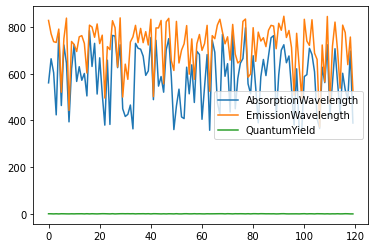

In [83]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=[5,4],dpi=300)
ax = nucleotides.plot()


We can also simply call columns of our data as though they were any other array of numbers (assuming the column is, in fact, strictly numerical).

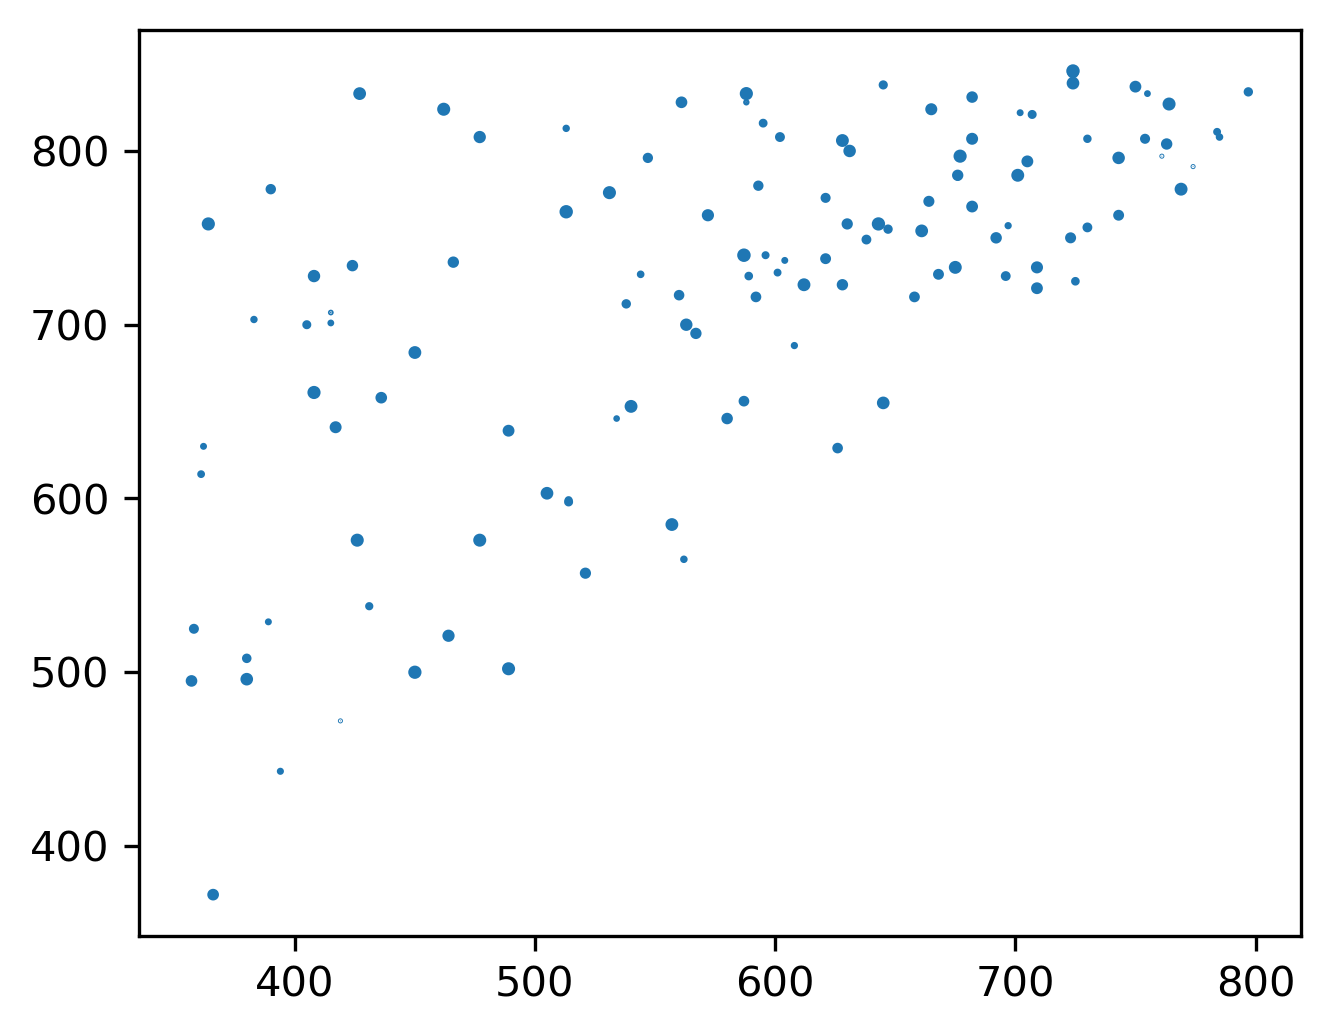

In [85]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=[5,4],dpi=300)
ax = fig.add_subplot(1,1,1)
ax.scatter(nucleotides["AbsorptionWavelength"],nucleotides["EmissionWavelength"],s=nucleotides["QuantumYield"]*5)

### I have included the QuantumYield column values as the marker size variable so that each point gives us the absorption/emission wavelengths and the quantum yields.